# Text Analysis for Digital Humanities: Project

This notebook is meant to help you with your own project. 
You are not expected to understand all the code in this notebook, but feel free to [submit a consulting request](https://dlab.berkeley.edu/consulting/submit-consulting-request) with me if you want to learn more.

<div class="alert alert-warning">
<b>Yellow text</b> like this indicates there are inputs and code that you can alter, so that it points to the texts and words you want to analyze.</div>


In [4]:
%pip install nltk
import nltk
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('stopwords')

Note: you may need to restart the kernel to use updated packages.


[nltk_data] Downloading package punkt to
[nltk_data]     /Users/tomvannuenen/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/tomvannuenen/nltk_data...
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     /Users/tomvannuenen/nltk_data...
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/tomvannuenen/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

## Import Data

<div class="alert alert-warning">
Change the <b>file_path</b> variable below to point to a text you are interested in exploring!
</div>

In [3]:
file_path = 'data/1895_wilde-oscar_the-importance-of-being-earnest.txt'

with open(file_path, 'r', encoding='utf-8') as file:
    text = file.read()

# NLTK Text objects

<div class="alert alert-warning">
Change the inputs for the methods below (currently 'brother', 'sister' etc.) to explore words of interest.

Concordance for input word:
Displaying 25 of 51 matches:
 always pretended to have a younger brother of the name of Ernest , who lives i
have invented a very useful younger brother called Ernest , in order that you m
 accepts me , I am going to kill my brother , indeed I think I 'll kill him in 
en propose for practice . I know my brother Gerald does . All my girl-friends t
nsense . Algernon : What about your brother ? What about the profligate Ernest 
! Jack : Very well , then . My poor brother Ernest was carried off suddenly , i
le too much interested in your poor brother Ernest ? Wo n't she feel his loss a
ts , that unfortunate young man his brother seems to be . But I must not distur
4 , The Albany , W. ' Uncle Jack 's brother ! Did you tell him Mr. Worthing was
 from your card , are Uncle Jack 's brother , my cousin Ernest , my wicked cous
 some terrible calamity ? Jack : My brother . Miss Prism : More shameful debts 
ack : [ -- ] Dead ! Chasuble : Your brother Ernest dead ? Jack 

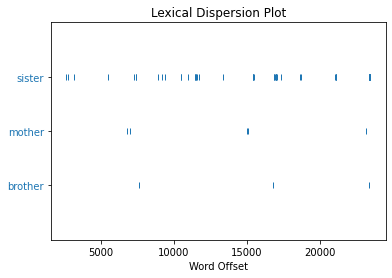

In [6]:
from nltk.text import Text
from nltk.tokenize import word_tokenize

# Assuming 'text' is your corpus as a single string
# Tokenize the corpus
tokens = word_tokenize(text)
# Create an NLTK Text object
nltk_text = Text(tokens)

# Example operations:
# 1. Concordance
print("Concordance for input word:")
nltk_text.concordance('brother')

# 2. Similar
print("\nWords similar to input word:")
nltk_text.similar('brother')

# 3. Common Contexts
print("\nCommon contexts of input words:")
nltk_text.common_contexts(['brother', 'sister'])

# 4. Collocations
print("\nCollocations in the text:")
nltk_text.collocations()

# 5. Dispersion Plot
print("\nDispersion plot for input words:")
nltk_text.dispersion_plot(['brother', 'mother', 'sister'])

# Comparative stylometry using TF-IDF

In [5]:
from nltk.corpus import gutenberg
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd
from sklearn.decomposition import PCA
from matplotlib import pyplot as plt
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [10, 10]

<div class="alert alert-warning">
Change the file paths for the <b>read_file</b> function calls below to point to texts you want to compare.
</div>

In [127]:
def read_file(file_path):
    with open(file_path, 'r', encoding='utf-8') as file:
        return file.read()

text1 = read_file('data/1853_boucicault-dion_grimaldi.txt')
text2 = read_file('data/1856_boucicault-dion_the-phantom.txt')
text3 = read_file('data/1919_yeats-wb_the-only-jealousy-of-emer.txt')
text4 = read_file('data/1895_wilde-oscar_the-importance-of-being-earnest.txt')
text5 = read_file('data/1895_shaw-george-bernard_you-never-can-tell.txt')

<div class="alert alert-warning">
Change the list items for <b>texts</b> below to the texts you are comparing. Note that I am simply using author names.

It is recommended to use at least 2 texts of the same author, so you can check if those texts are more similar.

</div>

In [128]:
texts = ['boucicault1','boucicault2','yeats','wilde','shaw']

In [169]:
tfidf = TfidfVectorizer(max_features=500)

In [170]:
tfidf_matrix = tfidf.fit_transform([text1, text2, text3, text4, text5])

In [171]:
tfidf_matrix

<5x7215 sparse matrix of type '<class 'numpy.float64'>'
	with 11884 stored elements in Compressed Sparse Row format>

**Sparse matrix**: Matrix (table) with some values missing    
**Dense matrix**: That matrix filled in (think: fillna(0)). 

In [172]:
tfidfDense = tfidf_matrix.todense()

In [173]:
labels = tfidf.get_feature_names_out()

In [174]:
df = pd.DataFrame(tfidfDense, index=texts, columns=labels)

In [175]:
df

,10,104,12,149,14th,1645,1750,1860,1896,1what,...,yours,yourself,yourselves,youth,yrs,ze,zem,zj,ça,émotion
boucicault1,0.001649,0.00000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.001649,...,0.008364,0.007074,0.003299,0.000000,0.001649,0.001649,0.003299,0.001649,0.003299,0.001649
boucicault2,0.000000,0.00000,0.000000,0.00000,0.00000,0.002359,0.002359,0.000000,0.000000,0.000000,...,0.003987,0.001124,0.000000,0.001580,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
yeats,0.000000,0.00000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.002796,0.000000,0.007858,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
wilde,0.000000,0.00118,0.000000,0.00236,0.00236,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.002660,0.001125,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
shaw,0.000000,0.00000,0.001306,0.00000,0.00000,0.000000,0.000000,0.000653,0.000653,0.000000,...,0.003678,0.004977,0.000000,0.001749,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


## Stylometry?

Stylometry is the "measurement of style." It's a way to show how the style of writers is similar or different. Style, in this case, deals with the 800 most frequent words, which are function words, rather than content words.

In [176]:
pca = PCA(2)

In [177]:
import numpy as np
tfidfArray = np.asarray(tfidfDense)

In [178]:
pcaOut = pca.fit_transform(tfidfArray)

In [179]:
pcaOut

array([[ 0.02893628,  0.4640677 ],
       [-0.21046529,  0.07160521],
       [-0.32289931, -0.32358129],
       [ 0.54142379, -0.19136394],
       [-0.03699547, -0.02072767]])

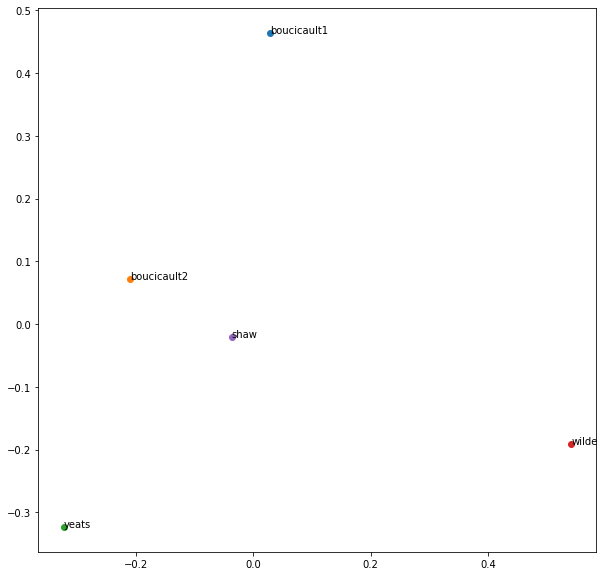

In [180]:
xs, ys = pcaOut[:,0], pcaOut[:,1]
for i in range(len(xs)): 
    plt.scatter(xs[i], ys[i])
    plt.annotate(texts[i], (xs[i], ys[i]))

<a id='topic'></a>
# Topic Modeling using Scikit-Learn

In [202]:
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd
from nltk import word_tokenize
%matplotlib inline
from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = [10, 5]

<div class="alert alert-warning">
Change the input of <b>split_text_into_chunks</b> below to the play you want to explore using topic modeling.<br>
It is recommended to use a longer play, as this will improve the topic model.
</div>

In [82]:
def split_text_into_chunks(text, chunk_size=2000):
    # Split the text into words
    words = text.split()
    
    # Calculate the number of chunks
    num_chunks = len(words) // chunk_size + (1 if len(words) % chunk_size > 0 else 0)
    
    # Split the words into chunks of the specified size
    chunks = [" ".join(words[i*chunk_size:(i+1)*chunk_size]) for i in range(num_chunks)]
    
    return chunks

author_chunks = split_text_into_chunks(author4)

In [83]:
len(author_chunks)

10

In [84]:
from gensim.parsing.preprocessing import STOPWORDS
from gensim import corpora
from gensim.utils import simple_preprocess

# Tokenize and preprocess documents
def preprocess(text):
    return [word for word in simple_preprocess(text) if word not in STOPWORDS]

# Preprocess the documents
processed_docs = [preprocess(doc) for doc in author_chunks]

# Create a dictionary representation of the documents
dictionary = corpora.Dictionary(processed_docs)

# Create a bag-of-words model for each document
bow_corpus = [dictionary.doc2bow(doc) for doc in processed_docs]


In [91]:
from gensim.models import LdaModel

# Number of topics
num_topics = 3

# Train the model on the bag-of-words corpus
lda_model = LdaModel(bow_corpus, num_topics=num_topics, id2word=dictionary, passes=20)

In [92]:
import pandas as pd

# Initialize an empty list to hold the topic distribution for each document
topics_over_time = []

for document_bow in bow_corpus:
    # Get the topic distribution for the document
    document_topics = lda_model.get_document_topics(document_bow, minimum_probability=0)
    # Convert the topic distribution to a dictionary with topic ID as keys and probability as values
    topic_prob_dict = {topic: prob for topic, prob in document_topics}
    # Append the topic distribution dictionary to the list
    topics_over_time.append(topic_prob_dict)

# Create a DataFrame from the list of topic distribution dictionaries
df_topics_over_time = pd.DataFrame(topics_over_time).fillna(0)  # Fill missing values with 0s

<Axes: >

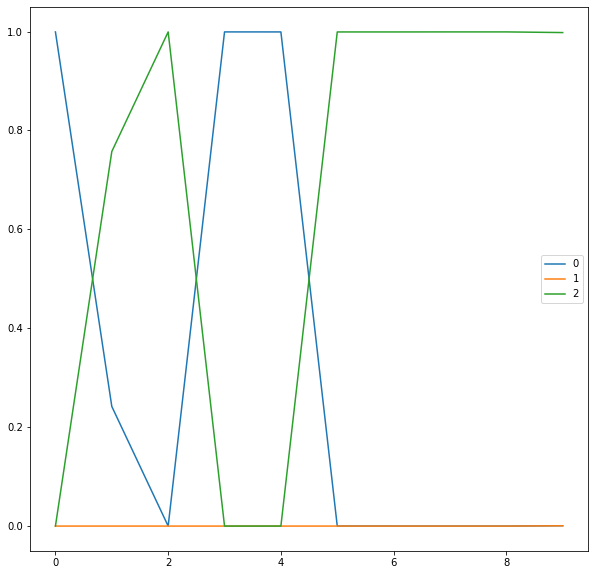

In [93]:
df_topics_over_time.plot()

In [94]:
import pyLDAvis.gensim_models as gensimvis
import pyLDAvis

# Prepare visualization
pyLDAvis.enable_notebook()
vis = gensimvis.prepare(lda_model, bow_corpus, dictionary)

# Display the visualization
vis

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
2     -0.031421  0.074428       1        1  65.177983
0     -0.067579 -0.058272       2        1  34.780603
1      0.099000 -0.016155       3        1   0.041414, topic_info=          Term        Freq       Total Category  logprob  loglift
47   bracknell  102.000000  102.000000  Default  30.0000  30.0000
199       lane   36.000000   36.000000  Default  29.0000  29.0000
198       lady  107.000000  107.000000  Default  28.0000  28.0000
18    algernon  215.000000  215.000000  Default  27.0000  27.0000
194       jack  230.000000  230.000000  Default  26.0000  26.0000
..         ...         ...         ...      ...      ...      ...
61        case    0.001564   17.547804   Topic3  -7.6795  -1.5359
134       fact    0.001564   23.433489   Topic3  -7.6798  -1.8254
376      uncle    0.001563   19.257493   Topic3  -7.6803  -1.6296
387        way    0.001563   20.153638   Topic3  -7.6804  -1.6752
426    bunbury    0.001563   34.022174   Topic3  -7.6804  -2.1988

[220 rows x 6 columns], token_table=      Topic      Freq      Term
term                           
401       1  1.024195  absolute
4         2  0.741318   account
12        2  0.741318   adopted
410       1  1.024434    advise
411       1  0.881451       age
...     ...       ...       ...
394       1  0.738640  worthing
394       2  0.265153  worthing
695       1  0.985770     years
398       1  0.605820       yes
398       2  0.390851       yes

[200 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[3, 1, 2])

<a id='ner'></a>
# Named Entity Recognition Using SpaCy

In [96]:
import spacy
spacy.cli.download('en_core_web_sm')
nlp = spacy.load('en_core_web_sm')

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 32.6 MB/s eta 0:00:00m eta 0:00:010:0101
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


<div class="alert alert-warning">
Change the input of <b>nlp</b> below to the play you want to explore using named entity recognition.<br>
</div>

In [97]:
doc = nlp(author4)

Here are some things that we can do with this object: 

In [99]:
[method for method in dir(doc) if not method.startswith('_')]

['cats',
 'char_span',
 'copy',
 'count_by',
 'doc',
 'ents',
 'extend_tensor',
 'from_array',
 'from_bytes',
 'from_dict',
 'from_disk',
 'from_docs',
 'from_json',
 'get_extension',
 'get_lca_matrix',
 'has_annotation',
 'has_extension',
 'has_unknown_spaces',
 'has_vector',
 'is_nered',
 'is_parsed',
 'is_sentenced',
 'is_tagged',
 'lang',
 'lang_',
 'mem',
 'noun_chunks',
 'noun_chunks_iterator',
 'remove_extension',
 'retokenize',
 'sentiment',
 'sents',
 'set_ents',
 'set_extension',
 'similarity',
 'spans',
 'tensor',
 'text',
 'text_with_ws',
 'to_array',
 'to_bytes',
 'to_dict',
 'to_disk',
 'to_json',
 'to_utf8_array',
 'user_data',
 'user_hooks',
 'user_span_hooks',
 'user_token_hooks',
 'vector',
 'vector_norm',
 'vocab']

## Named Entity Recognition

Explore the types of entities in a subset of words of your text.

<div class="alert alert-warning">
Play around with the slicing of <b>doc</b> below to see other subsets of words in your play. Does any type of Named Entity stand out? Which would you like to explore further?<br>
</div>

In [254]:
for word in doc[50:250]: 
    if len(word.text.strip()) > 0 and len(word.ent_type_) > 0: 
        print(word.text.strip(), ':', word.ent_type_)

Lane : PERSON
Lane : PERSON
Lane : PERSON
Lady : PERSON
Bracknell : PERSON
Lane : PERSON
two : CARDINAL
Lane : PERSON
Thursday : DATE
night : TIME
eight : CARDINAL
Lane : PERSON
eight : CARDINAL


We can extract places like this: 

In [107]:
for word in doc[:2000]: 
    if len(word.ent_type_) > 0: 
        if word.ent_type_ == 'GPE': 
            print(word)

Shropshire
Shropshire
Gwendolen
Gwendolen
Gwendolen
Cecily
Cecily


And persons like this:

In [111]:
for word in doc[1000:2000]: 
    if len(word.ent_type_) > 0: 
        if word.ent_type_ == 'PERSON': 
            print(word)

Jack
Algy
Aunt
Augusta
Jack
Gwendolen
Jack
Jack
Jack
Jack
Gwendolen
Algy
Worthing
Lane
Jack
Jack
Algernon
Lane
Ernest
Jack
Jack
Jack
Jack
Algy
Jack


And locations like this: 

In [105]:
for word in doc[:4000]: 
    if len(word.ent_type_) > 0: 
        if word.ent_type_ == 'LOC': 
            print(word)

Algernon
Half
-
Moon
Street


<div class="alert alert-warning">
You can change <b>GPE</b> below to <b>TIME</b>, <b>GPE</b> or <b>PERSON</b> depending on which Named Entities you want to explore.
</div>

In [118]:
for word in doc[:4000]: 
    if len(word.ent_type_) > 0: 
        if word.ent_type_ == 'GPE': 
            print(word)

Shropshire
Shropshire
Gwendolen
Gwendolen
Gwendolen
Cecily
Cecily
Albany
Gwendolen
Shropshire
Shropshire
Albany
Willis
London
Gwendolen
Gwendolen
Willis
Gwendolen


In [119]:
ents = [word.text for word in doc if word.ent_type_ == 'GPE']

Let's see are all the unique Named Entities for the class you have chosen:

In [123]:
set(ents)

{'Albany',
 'Australia',
 'Cardew',
 'Cecily',
 'Egeria',
 'Ernest',
 'Evensong',
 'Fairfax',
 'Fifeshire',
 'Gwendolen',
 'Hertfordshire',
 'Leamington',
 'London',
 'Metropolitan',
 'Miss.',
 'N.B.',
 'Pagan',
 'Paris',
 'Shropshire',
 'Sporran',
 'Sussex',
 'Willis',
 'Woolton'}

We can count our list of times, put this into a Pandas Series, and plot them, to try to show what kinds of times occur most often in Betteredge's narrative: 

<Axes: >

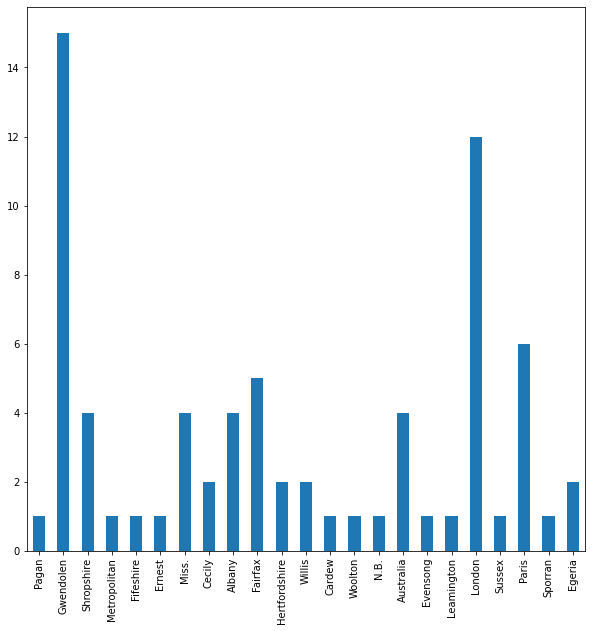

In [125]:
from collections import Counter

pd.Series(Counter(ents))[list(set(ents))].plot(kind='bar')

See how frequently places occur in narrative time. 

<Axes: >

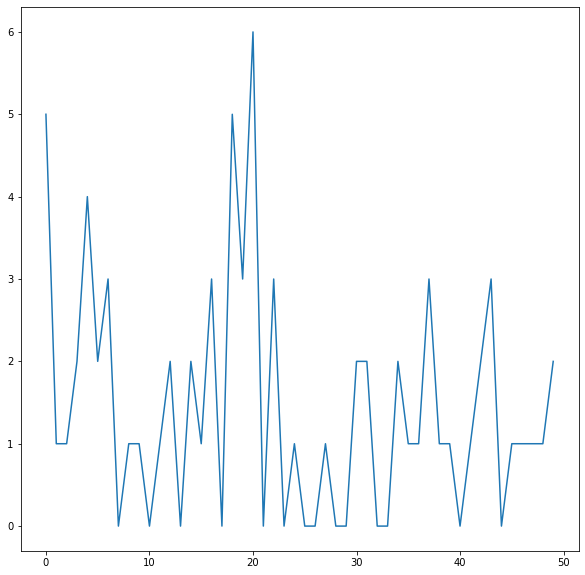

In [126]:
times = pd.Series(np.histogram([word.i for word in doc if word.ent_type_ == 'GPE'], bins=50)[0])
times.plot()